Based on [KD Nuggets article](https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html)

In [4]:
%matplotlib inline
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import soundfile as sf
import sklearn

In [5]:
"Loading an audio file:"

audio_data = '../audios/train/cat/cat_1.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr)) # <class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050

<class 'numpy.ndarray'> <class 'int'>


In [6]:
"This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. We can change this behavior by resampling at 44.1KHz."

librosa.load(audio_data, sr=44100)

#or to disable resampling.
#librosa.load(audio_data, sr=None)

(array([ 0.00381674,  0.00447728,  0.00407222, ..., -0.01654916,
        -0.01206964, -0.00581056], dtype=float32),
 44100)

In [7]:
ipd.Audio(audio_data)

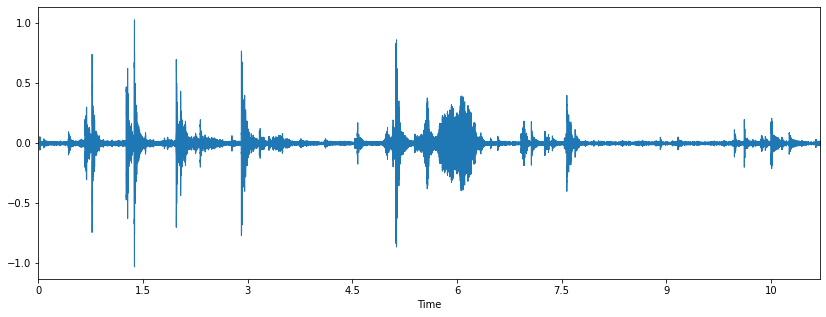

In [8]:
### Visualizing audio

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## Spectogram

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

We can display a spectrogram using. librosa.display.specshow.

.stft() converts data into short term Fourier transform. STFT converts signals such that we can know the amplitude of the given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.  is used to display a spectrogram..specshow

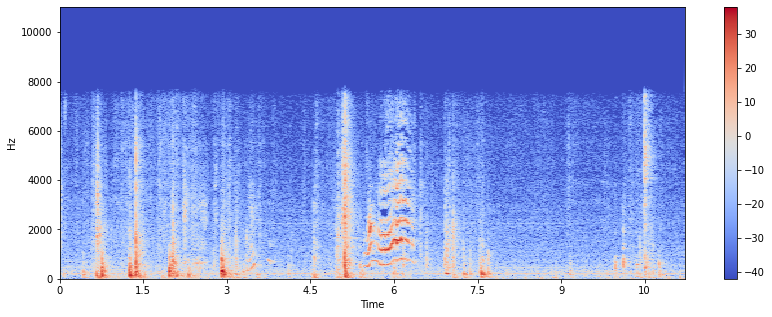

In [9]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.

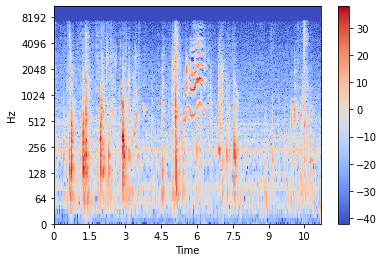

In [10]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Create an Audio Signal:

In [11]:
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz

#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array

#Saving the audio
sf.write('./tone220.wav', x, sr)

## Feature extraction from Audio signal
 
Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. Let us study a few of the features in detail.

The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.

# 1. Spectral Centroid

The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean:

![](https://miro.medium.com/max/355/1*DkT47WzLrjigT_KVhDoMuQ.png)

where S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k.

`librosa.feature.spectral_centroid` computes the spectral centroid for each frame in a signal:

.spectral_centroid will return an array with columns equal to a number of frames present in your sample.

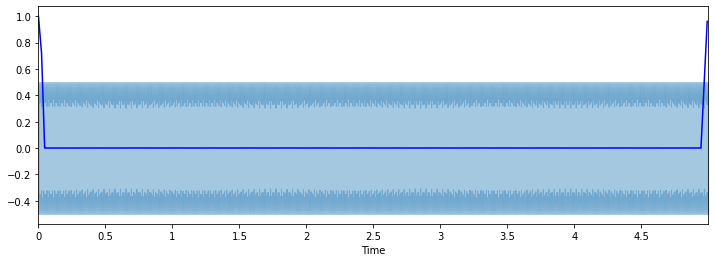

In [12]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)

# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')